## Clairborne County Analysis

#### Import Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

#### Exploratory Data Analysis

In [20]:
clairborne_df = pd.read_csv('../Data/Claiborne_county_synthetic_data.csv', usecols = ["Race", "Age", "Gender", "Education Level", "Employment Status", "Income Level", "Prior Convictions", "Risk Score", "Judge Decision", "Re-offense"], index_col=False)

# Display the first few rows of the dataframe
# This will help us understand the structure of the data and what columns are available for analysis
clairborne_df.head()

,Race,Age,Gender,Education Level,Employment Status,Income Level,Prior Convictions,Risk Score,Judge Decision,Re-offense
0,Black,62,Male,Bachelor's Degree,Employed,34165.969893,5,1.949816,1,0
1,Black,48,Male,Bachelor's Degree,Employed,73102.340993,3,7.631000,0,0
2,Black,44,Male,High School,Unemployed,78046.909354,2,6.278393,1,0
3,Black,63,Female,Bachelor's Degree,Employed,121869.327498,1,5.098658,0,0
4,Black,53,Female,Bachelor's Degree,Employed,73289.622946,2,3.724815,1,0


In [21]:
# Display the data types of each column
# This will help us understand the types of data we are working with
# and if any conversions are needed
clairborne_df.dtypes

Race                  object
Age                    int64
Gender                object
Education Level       object
Employment Status     object
Income Level         float64
Prior Convictions      int64
Risk Score           float64
Judge Decision         int64
Re-offense             int64
dtype: object

In [22]:
# Display the summary statistics of the dataframe
# This will provide insights into the distribution of numerical columns and help identify any potential outliers
clairborne_df.describe()

,Age,Income Level,Prior Convictions,Risk Score,Judge Decision,Re-offense
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,46.948000,46103.676532,1.690000,5.750037,0.370000,0.336000
std,16.525144,33270.924362,1.327276,2.074684,0.483046,0.472575
min,18.000000,14252.030439,0.000000,0.902431,0.000000,0.000000
25%,33.000000,15437.337260,1.000000,4.198450,0.000000,0.000000
50%,47.000000,35059.753290,2.000000,5.735148,0.000000,0.000000
75%,61.000000,73698.938376,2.000000,7.277075,1.000000,1.000000
max,75.000000,130966.348850,6.000000,10.973774,1.000000,1.000000


In [23]:
# Display the number of missing values in each column
# This will help us identify if any data cleaning is needed before analysis 
# No missing values identified
clairborne_df.isnull().sum()

Race                 0
Age                  0
Gender               0
Education Level      0
Employment Status    0
Income Level         0
Prior Convictions    0
Risk Score           0
Judge Decision       0
Re-offense           0
dtype: int64

#### Demographic Profiles

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_15592/3442363977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_counts.index, y=race_counts.values, palette="viridis")


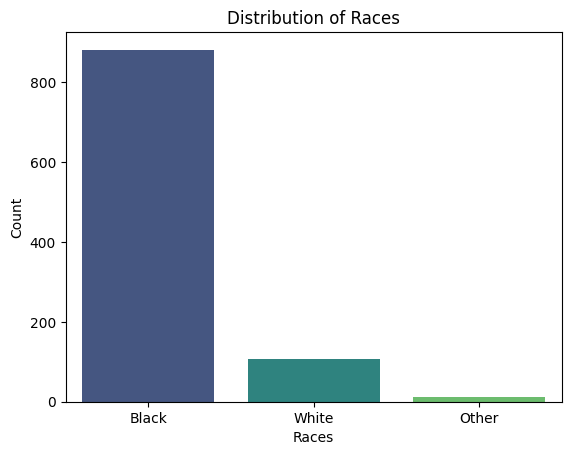

In [ ]:
# Distribution of the Race Column
race_counts = clairborne_df['Race'].value_counts()
sns.barplot(x=race_counts.index, y=race_counts.values, palette="viridis")
plt.title('Distribution of Races')
plt.xlabel ("Races")
plt.ylabel ("Count")
plt.show()

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_15592/4162998845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")


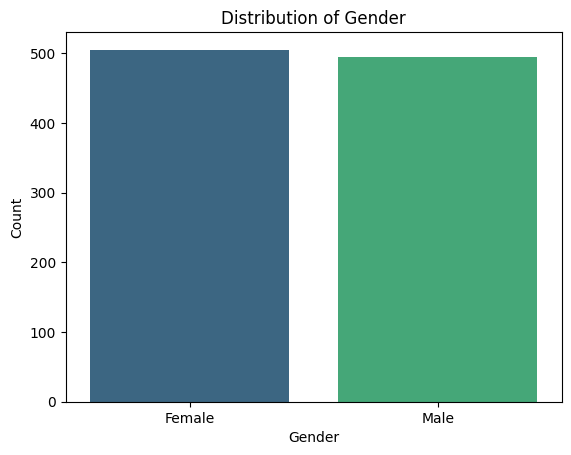

In [29]:
# Distribution of the Gender Column
gender_counts = clairborne_df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title('Distribution of Gender')
plt.xlabel ("Gender")
plt.ylabel ("Count")
plt.show()

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_15592/2332269445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette="viridis")


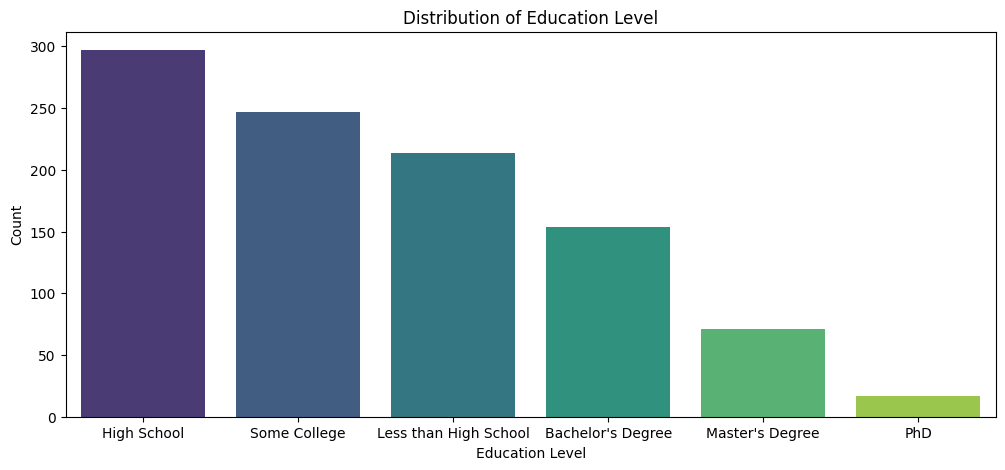

In [34]:
# Distribution of the Education Level Column
plt.figure(figsize=(12, 5))

education_counts = clairborne_df['Education Level'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values, palette="viridis")
plt.title('Distribution of Education Level')
plt.xlabel ("Education Level")
plt.ylabel ("Count")
plt.show()